## Auto-generate cluster boundaries with Delaunay triangulation


In [1]:
import geopandas
from geopandas import GeoSeries
import shapely.geometry
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#%matplotlib notebook
%matplotlib inline
mpl.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
# load Delaunay triangulation
gpd_dt = geopandas.read_file("v10class2d_vt_clipped.geojson")
gpd_dt = gpd_dt.astype({"POINTA": int,"POINTB": int,"POINTC": int})

In [4]:
# load 2 class example
gpd = geopandas.read_file("v2class2d_1.geojson")

In [5]:
# a function two draw Delaunay triangulation and classification
def drawtwoplots(gpd_dt,gpd_pt, title,line=False):
    fig, ax = plt.subplots()
    if line:
        gpd_dt.plot(ax=ax, color='red')
    else:
        gpd_dt.plot(ax=ax, color='white', edgecolor="grey")
    gpd.plot(ax=ax, marker='o',column="Label", markersize=10,cmap="brg")
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show();

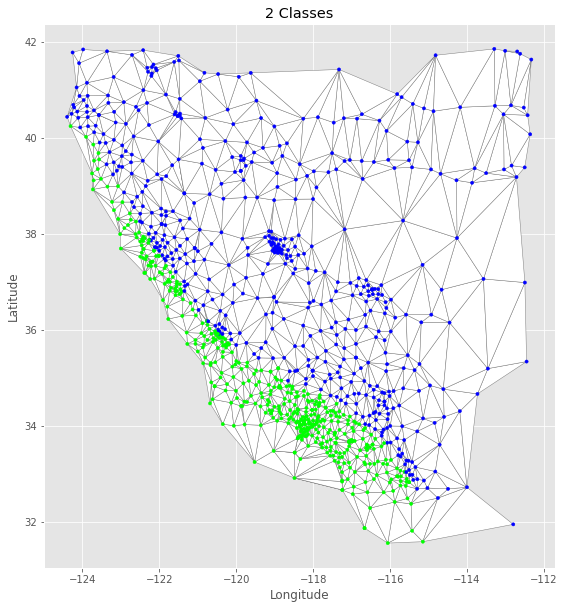

In [6]:
drawtwoplots(gpd_dt,gpd,"2 Classes")

In [7]:
def extract_tangles(gpd_dt,gpd_pt):
    # extract trangles contains more than one classes
    label_list = []
    for i in range(len(gpd_dt)):
        [pointa,pointb,pointc] = gpd_dt.iloc[i,[0,1,2]].tolist()
        a_class = gpd_pt.iloc[pointa].Label
        b_class = gpd_pt.iloc[pointb].Label
        c_class = gpd_pt.iloc[pointc].Label
        if (a_class == b_class) and (b_class==c_class):
            label = 0
        else:
            label = 1
        label_list.append(label)
    gpd_dt_labeled = gpd_dt.assign(Label = label_list)
    return gpd_dt_labeled

In [8]:
gpd_dt_labeled = extract_tangles(gpd_dt,gpd)

In [9]:
gpd_tr = gpd_dt_labeled[(gpd_dt_labeled['Label']==1)]

<AxesSubplot:>

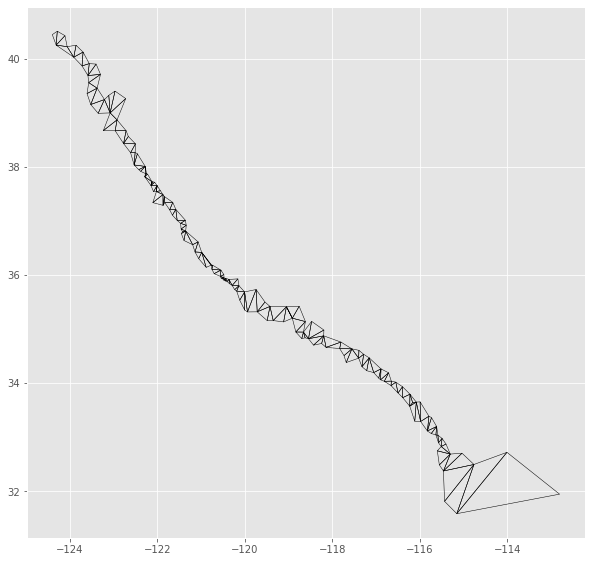

In [10]:
gpd_tr.plot(facecolor='none',edgecolor='black')

In [11]:
# load 4class example
gpd = geopandas.read_file("v4class2d_1.geojson")

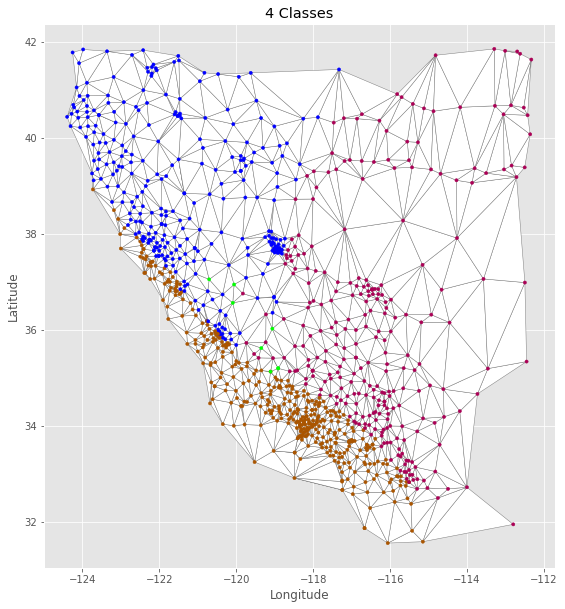

In [12]:
drawtwoplots(gpd_dt,gpd,"4 Classes")

<AxesSubplot:>

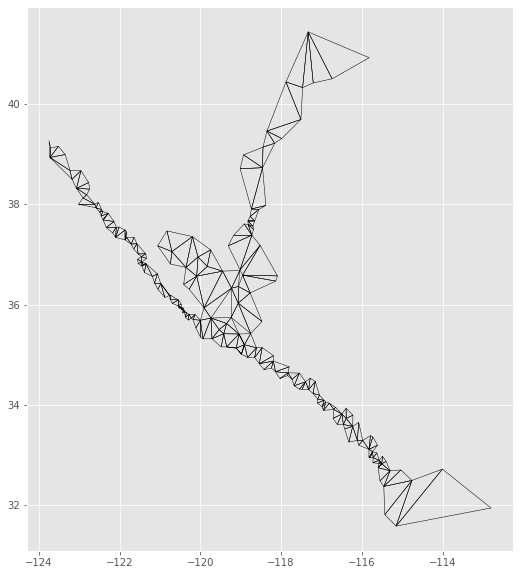

In [13]:
gpd_dt_labeled = extract_tangles(gpd_dt,gpd)
gpd_tr = gpd_dt_labeled[(gpd_dt_labeled['Label']==1)]
gpd_tr.plot(facecolor='none',edgecolor='black')

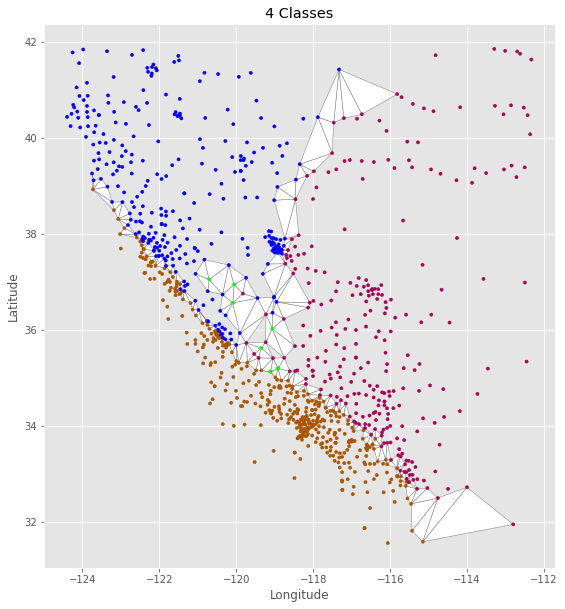

In [14]:
drawtwoplots(gpd_tr,gpd,"4 Classes")

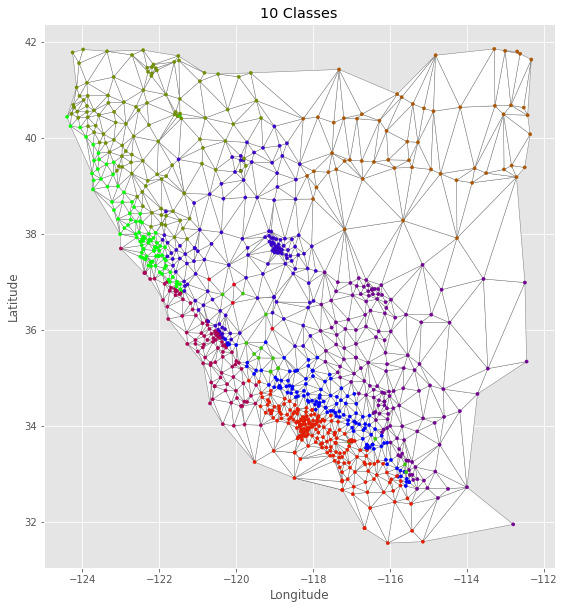

In [15]:
# load 10class example
gpd = geopandas.read_file("v10class2d_1.geojson")
drawtwoplots(gpd_dt,gpd,"10 Classes")

<AxesSubplot:>

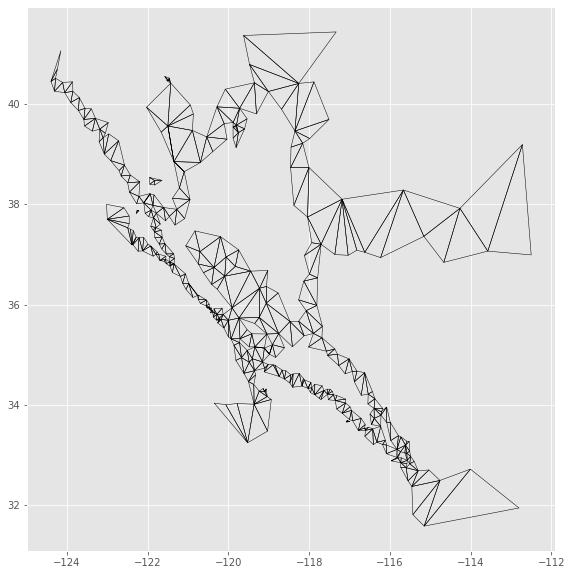

In [16]:
gpd_dt_labeled = extract_tangles(gpd_dt,gpd)
gpd_tr = gpd_dt_labeled[(gpd_dt_labeled['Label']==1)]
gpd_tr.plot(facecolor='none',edgecolor='black')


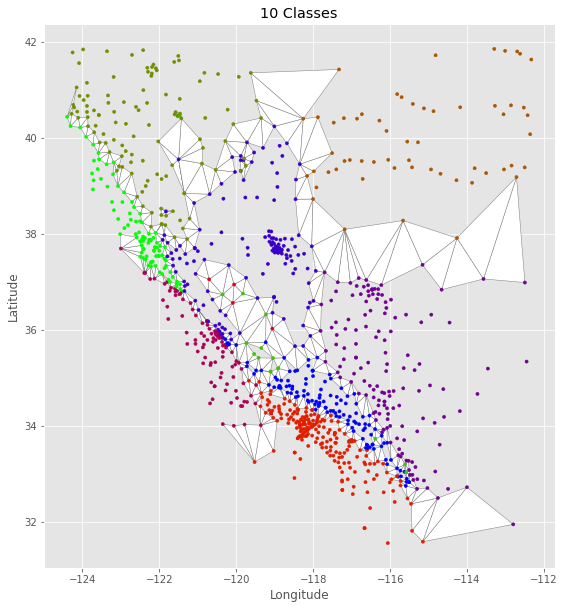

In [17]:
drawtwoplots(gpd_tr,gpd,"10 Classes")

In [18]:
from shapely.ops import cascaded_union

In [19]:
merged = cascaded_union(gpd_tr.geometry)

In [20]:
from centerline.geometry import Centerline


<AxesSubplot:>

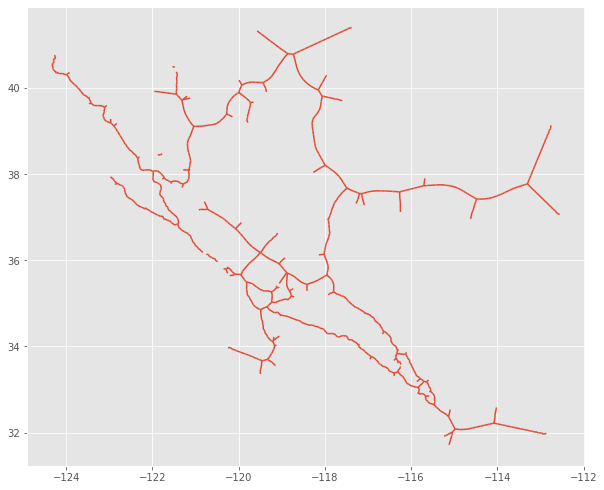

In [21]:
attributes = {"id": 1, "name": "polygon", "valid": True}
centerline = Centerline(merged,interpolation_distance=0.1, **attributes)
geo=GeoSeries(centerline.geoms)
geo.plot()

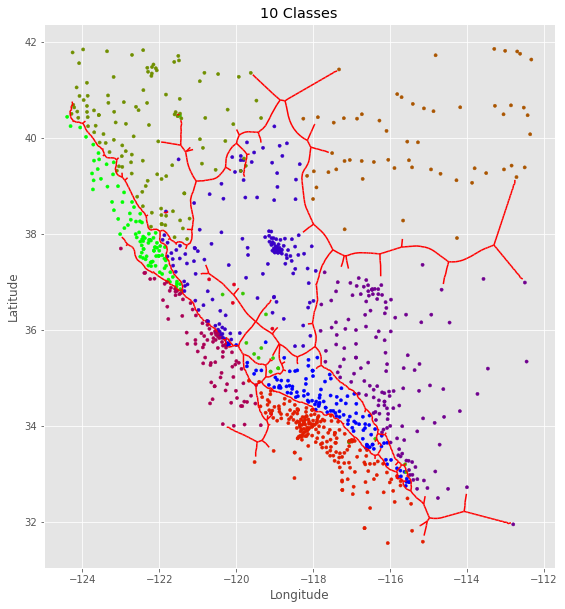

In [22]:
drawtwoplots(geo,gpd,"10 Classes",line=True)